Ячейка 1. Импорт и загрузка очишенного DF

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# Загружаем очищенный датафрейм
df = pd.read_csv("../data/processed/df_clean.csv")

Ячейка 2. Распределение длительности госпитализации

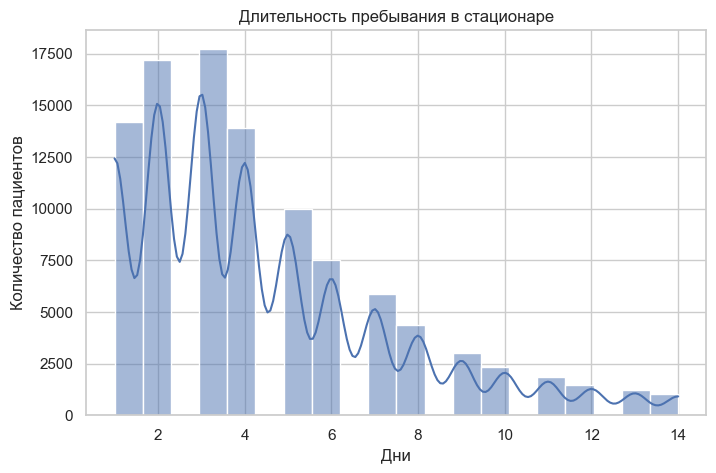

In [10]:
sns.histplot(df['time_in_hospital'], bins=20, kde=True)
plt.title("Длительность пребывания в стационаре")
plt.xlabel("Дни")
plt.ylabel("Количество пациентов")
plt.show()

Ячейка 3. Распределение возраста

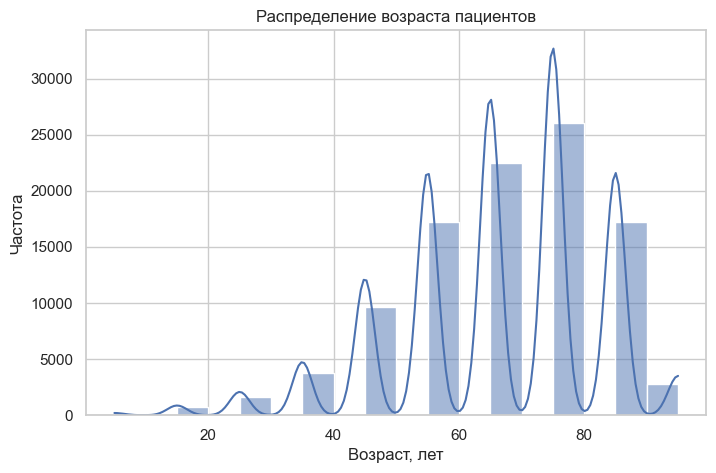

In [11]:
sns.histplot(df['age_num'], bins=18, kde=True)
plt.title("Распределение возраста пациентов")
plt.xlabel("Возраст, лет")
plt.ylabel("Частота")
plt.show()

 Ячейка 4. Пол и раса

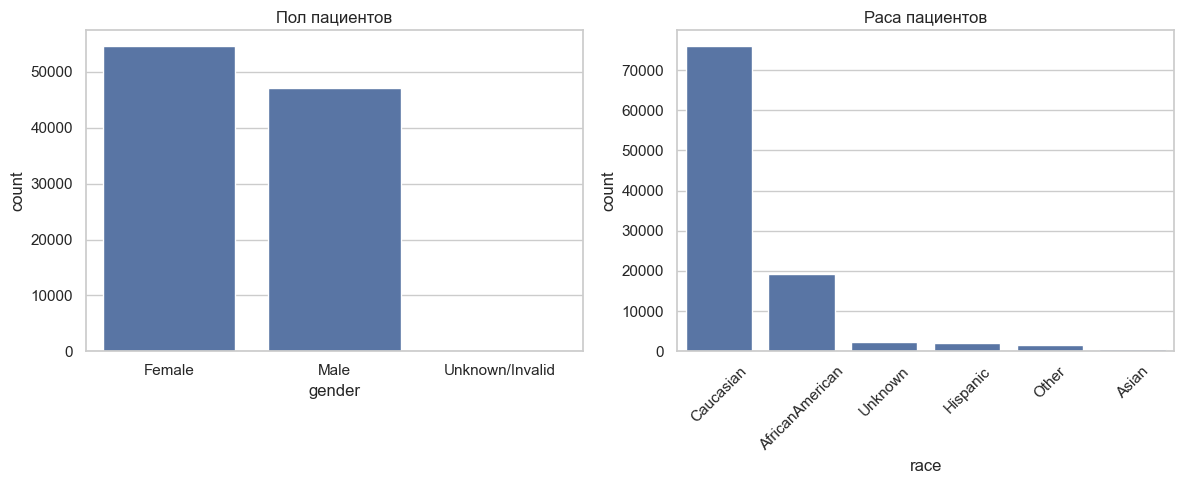

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(data=df, x='gender', ax=axes[0])
axes[0].set_title("Пол пациентов")
sns.countplot(data=df, x='race', order=df['race'].value_counts().index, ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title("Раса пациентов")
plt.tight_layout()
plt.show()

Ячейка 5. Корреляционная матрица числовых признаков

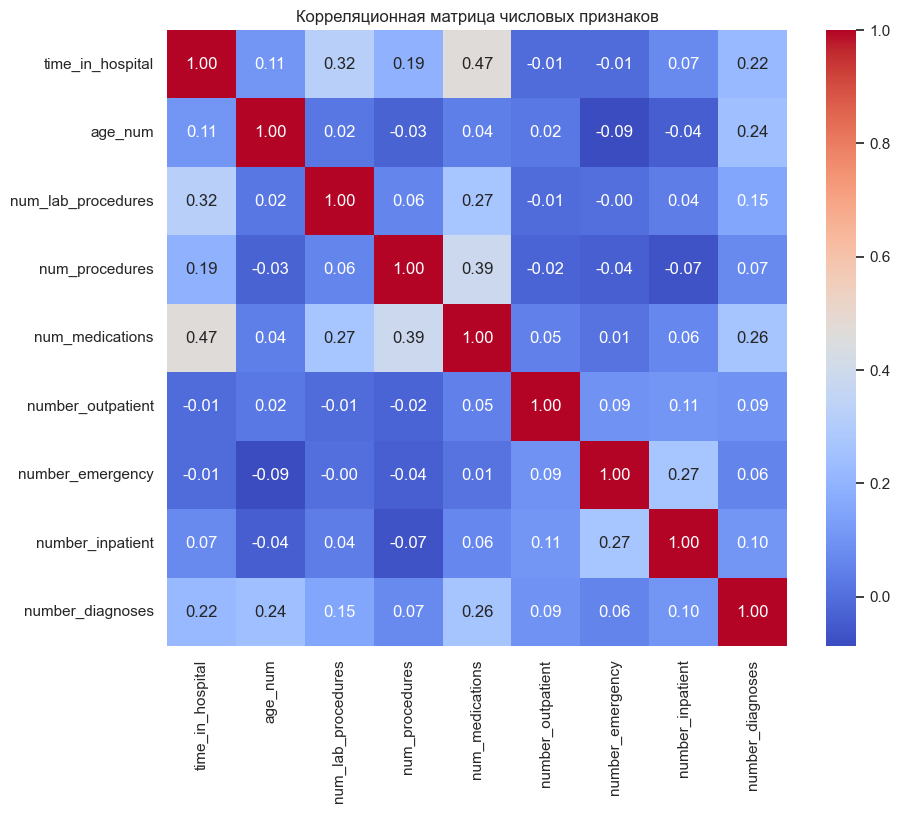

In [13]:
num_cols = ['time_in_hospital', 'age_num', 'num_lab_procedures',
            'num_procedures', 'num_medications', 'number_outpatient',
            'number_emergency', 'number_inpatient', 'number_diagnoses']

corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица числовых признаков")
plt.show()

Ячейка 6. Анализ целевой переменной

Оригинальные категории readmitted:
 readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64 

Проценты:
 readmitted
NO     53.91
>30    34.93
<30    11.16
Name: count, dtype: float64 %



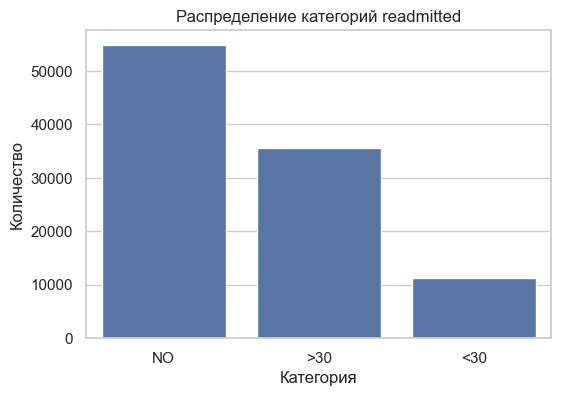

Binary target (0=no, 1=<30):
 readmit_bin
0    90409
1    11357
Name: count, dtype: int64 

Процент 1: 11.16 %



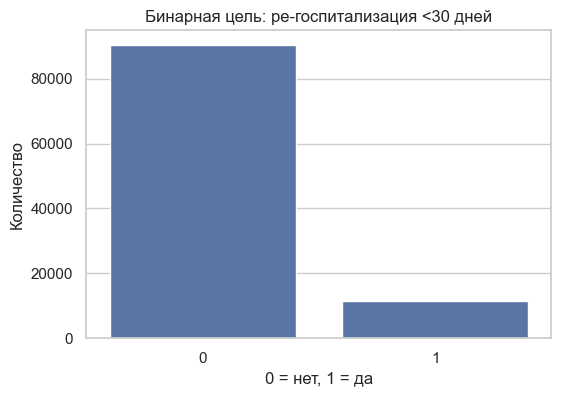

In [ ]:
# 1) Создаём бинарную цель: 1  -  если ре - госпитализация <30 дней, 0  -  иначе
df['readmit_bin'] = (df['readmitted'] == '<30').astype(int)

# 2) Распределение оригинальных категорий readmitted
orig_counts = df['readmitted'].value_counts()
print("Оригинальные категории readmitted:\n", orig_counts, "\n")
print("Проценты:\n", (orig_counts / len(df) * 100).round(2), "%\n")

plt.figure(figsize=(6,4))
sns.countplot(x='readmitted', data=df, order=orig_counts.index)
plt.title("Распределение категорий readmitted")
plt.xlabel("Категория")
plt.ylabel("Количество")
plt.show()

# 3) Распределение бинарной цели readmit_bin
bin_counts = df['readmit_bin'].value_counts()
print("Binary target (0=no, 1=<30):\n", bin_counts, "\n")
print("Процент 1:", (df['readmit_bin'].mean() * 100).round(2), "%\n")

plt.figure(figsize=(6,4))
sns.countplot(x='readmit_bin', data=df, order=bin_counts.index)
plt.title("Бинарная цель: ре - госпитализация <30 дней")
plt.xlabel("0 = нет, 1 = да")
plt.ylabel("Количество")
plt.show()

### 1. Распределение длительности стационарного лечения (`time_in_hospital`)
 -  Большинство пациентов проводят в больнице **от 2 до 6 дней**, при этом наиболее частая длительность  -  **3–4 дня**.
 -  Есть «длинный хвост» пациентов, остающихся на **7–14 дней**, но их доля невелика.
 -  Среднее время пребывания ~ 4.4 дня, медиана = 4 дня, что соответствует основной массе случаев.

### 2. Распределение возраста (`age_num`)
 -  Пациенты сосредоточены в возрастных группах **55–65**, **65–75** и **75–85 лет**.
 -  Минимальный возраст = 5 лет, максимальный = 95 лет, средний ~ 66 лет.
 -  Видно несколько «пиков» на каждом 10 - летнем интервале, что отражает исходные категориальные группы.

### 3. Пол и раса пациентов
 -  **Женщин** (~ 54 800) немного больше, чем **мужчин** (~ 47 000), доля неизвестных/некорректных значений минимальна.
 -  По расовому составу **большая часть  - Caucasian** (~ 75 000), затем **AfricanAmerican** (~ 19 000), остальные группы составляют малую долю.

### 4. Распределение целевой переменной (`readmitted`)
 -  Около **54 %** случаев  -  пациенты **не возвращаются** (NO).
 -  Примерно **35 %** возвращаются **более чем через 30 дней** (>30).
 -  И только **~ 11 %** пациентов ре - госпитализируются **<30 дней**.

### 5. Бинарная цель (`readmit_bin`)
 -  После преобразования в «1 = ре - госпитализация <30 дней» и «0 = иначе» мы получили **11 357 положительных примеров** из **101 766** (~ 11 %).
 -  Класс «1» значительно менее представлен, что нужно учитывать при обучении (балансировка классов или взвешивание).

### 6. Корреляционная матрица числовых признаков
 -  **`time_in_hospital`** умеренно коррелирует с **`num_medications`** (~ 0.47) и **`num_lab_procedures`** (~ 0.32): чем больше процедур и медикаментов, тем дольше пациент остаётся в стационаре.
 -  **`number_diagnoses`** также имеет слабую связь с длительностью (~ 0.22).
 -  Остальные числовые признаки показывают слабую или нулевую корреляцию между собой, что говорит об относительной независимости.

 -  -  - 

**Вывод:**  
Данные готовы к построению моделей: мы видим, какие признаки влияют на длительность пребывания и где возможна балансировка целевой переменной. 

Следующий шаг  -  создать простой baseline - классификатор для предсказания ре - госпитализации в 30 - дневный период.  
